## Instagram API Access

In [35]:
CLIENT_ID = 'e06ea50d76524d9aa66e758b2e1b1a10'
CLIENT_SECRET = 'f240ee2ed3d049058487f5eb83b69bea'

REDIRECT_URI = 'http://anagno.com/'

base_url = 'https://api.instagram.com/oauth/authorize/'

url = '{0}?client_id={1}&redirect_uri={2}&response_type=code&scope=public_content'.format(base_url, CLIENT_ID, REDIRECT_URI)

print('Click the following URL, which will taken you to the REDIRECT_URI you set in creating the APP.')
print('You may need to log into Instagram.')
print()
print(url)

Click the following URL, which will taken you to the REDIRECT_URI you set in creating the APP.
You may need to log into Instagram.

https://api.instagram.com/oauth/authorize/?client_id=e06ea50d76524d9aa66e758b2e1b1a10&redirect_uri=http://anagno.com/&response_type=code&scope=public_content


In [36]:
import requests # pip install requests

CODE = '78be864b693146ed89d35667128f9ae6'

payload = dict(client_id=CLIENT_ID, 
               client_secret=CLIENT_SECRET,
               grant_type='authorization_code',
               redirect_uri=REDIRECT_URI,
               code=CODE)

response = requests.post(
    'https://api.instagram.com/oauth/access_token',
    data = payload)

In [37]:
response.json()

{'access_token': '4622338623.e06ea50.10589b7343054d84ad99900b21f02e74',
 'user': {'id': '4622338623',
  'username': 'ge_anagno',
  'profile_picture': 'https://scontent.cdninstagram.com/vp/8cfa48a75f91a4ab1bd0273d18fa5a85/5D143B84/t51.2885-19/s150x150/30079070_883696551817036_7308215161444106240_n.jpg?_nc_ht=scontent.cdninstagram.com',
  'full_name': 'Georgios Anagnostopoulos',
  'bio': '',
  'website': '',
  'is_business': False}}

In [38]:
ACCESS_TOKEN = response.json()['access_token']
ACCESS_TOKEN

'4622338623.e06ea50.10589b7343054d84ad99900b21f02e74'

In [43]:
response = requests.get('https://api.instagram.com/v1/users/self/?access_token='+ACCESS_TOKEN)

print(response.text)

{"data": {"id": "4622338623", "username": "ge_anagno", "profile_picture": "https://scontent.cdninstagram.com/vp/8cfa48a75f91a4ab1bd0273d18fa5a85/5D143B84/t51.2885-19/s150x150/30079070_883696551817036_7308215161444106240_n.jpg?_nc_ht=scontent.cdninstagram.com", "full_name": "Georgios Anagnostopoulos", "bio": "This is not a drill", "website": "http://anagno.com/", "is_business": false, "counts": {"media": 9, "follows": 80, "followed_by": 81}}, "meta": {"code": 200}}


## Retrieving your Feed

In [81]:
from IPython.display import display, Image 

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

def display_image_feed(feed, include_captions=True):
    for post in feed['data']:
        display(Image(url=post['images']['standard_resolution']['url']))
        print(post['images']['standard_resolution']['url'])
        if include_captions: print(post['caption']['text'])
        print()

## Anatomy of an Instagram Post

In [89]:
import json

response = requests.get('https://api.instagram.com/v1/users/self/media/recent/?access_token='+ACCESS_TOKEN)
recent_posts = response.json()

#print(json.dumps(recent_posts, indent=1))

In [90]:
print(recent_posts.keys())

dict_keys(['pagination', 'data', 'meta'])


In [91]:
print(recent_posts['pagination'])
print(recent_posts['meta'])

{}
{'code': 200}


In [92]:
#print(json.dumps(recent_posts['data'], indent=1))

In [93]:
print(json.dumps(recent_posts['data'][0], indent=1))

{
 "id": "1973192693577619527_4622338623",
 "user": {
  "id": "4622338623",
  "full_name": "Georgios Anagnostopoulos",
  "profile_picture": "https://scontent.cdninstagram.com/vp/8cfa48a75f91a4ab1bd0273d18fa5a85/5D143B84/t51.2885-19/s150x150/30079070_883696551817036_7308215161444106240_n.jpg?_nc_ht=scontent.cdninstagram.com",
  "username": "ge_anagno"
 },
 "images": {
  "thumbnail": {
   "width": 150,
   "height": 150,
   "url": "https://scontent.cdninstagram.com/vp/9bba0aaf4d7ff288f82a8d3f3683e701/5D23C454/t51.2885-15/e35/s150x150/50262152_2125692624188363_6673113234964835916_n.jpg?_nc_ht=scontent.cdninstagram.com"
  },
  "low_resolution": {
   "width": 320,
   "height": 320,
   "url": "https://scontent.cdninstagram.com/vp/a8165e7b3acf89707f9263ad020375af/5D27CA2C/t51.2885-15/e35/s320x320/50262152_2125692624188363_6673113234964835916_n.jpg?_nc_ht=scontent.cdninstagram.com"
  },
  "standard_resolution": {
   "width": 640,
   "height": 640,
   "url": "https://scontent.cdninstagram.com/vp

## Artificial Neural Networks

In [2]:
from sklearn import datasets, metrics
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()

# Rescale the data and split into training and test sets
X, y = digits.data / 255., digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print()
print("Training set score: {0}".format(mlp.score(X_train, y_train)))
print("Test set score: {0}".format(mlp.score(X_test, y_test)))

Iteration 1, loss = 2.08212650
Iteration 2, loss = 1.03684958
Iteration 3, loss = 0.46502758
Iteration 4, loss = 0.29285682
Iteration 5, loss = 0.22862621
Iteration 6, loss = 0.18877491
Iteration 7, loss = 0.15163667
Iteration 8, loss = 0.13317189
Iteration 9, loss = 0.11696284
Iteration 10, loss = 0.09268670
Iteration 11, loss = 0.08840361
Iteration 12, loss = 0.08064708
Iteration 13, loss = 0.06800582
Iteration 14, loss = 0.06649765
Iteration 15, loss = 0.05651331
Iteration 16, loss = 0.05649585
Iteration 17, loss = 0.06339016
Iteration 18, loss = 0.06884457
Iteration 19, loss = 0.05704660
Iteration 20, loss = 0.03854956
Iteration 21, loss = 0.04014536
Iteration 22, loss = 0.03665529
Iteration 23, loss = 0.03645015
Iteration 24, loss = 0.03215832
Iteration 25, loss = 0.03771792
Iteration 26, loss = 0.04243158
Iteration 27, loss = 0.03183698
Iteration 28, loss = 0.02469338
Iteration 29, loss = 0.03504355
Iteration 30, loss = 0.04012626
Iteration 31, loss = 0.03171065
Iteration 32, los

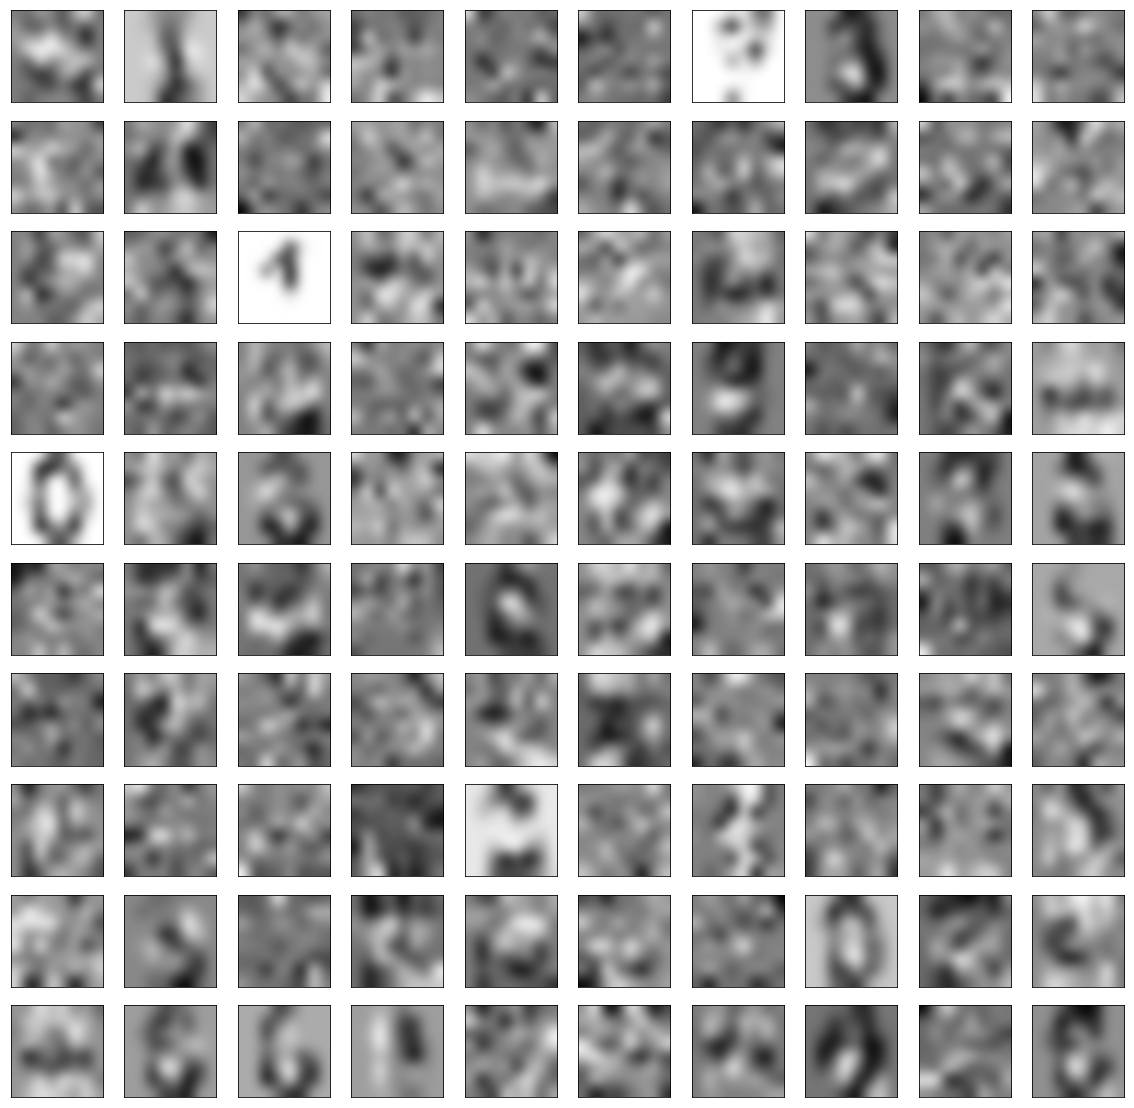

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, axes = plt.subplots(10,10)
fig.set_figwidth(20)
fig.set_figheight(20)

for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(8, 8), cmap=plt.cm.gray, interpolation='bicubic')
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

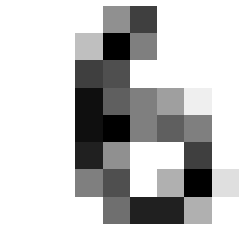

Ground Truth: 6
Predicted: 6


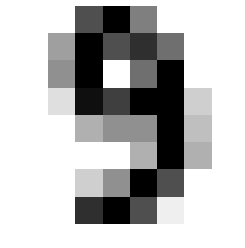

Ground Truth: 9
Predicted: 9


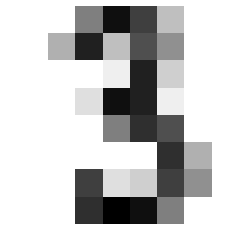

Ground Truth: 3
Predicted: 3


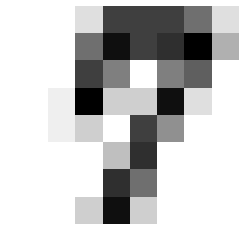

Ground Truth: 7
Predicted: 7


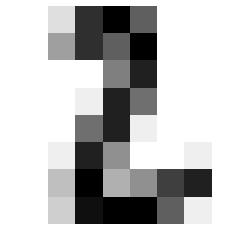

Ground Truth: 2
Predicted: 2


In [4]:
import numpy as np # pip install numpy
predicted = mlp.predict(X_test)

for i in range(5):
    image = np.reshape(X_test[i], (8,8))
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.axis('off')
    plt.show()
    print('Ground Truth: {0}'.format(y_test[i]))
    print('Predicted: {0}'.format(predicted[i]))